# Image Registration

Anwesha Paul <br>
MDS202213

In [1]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mouse_handler(event, x, y, flags, data):
    '''
    Callback function for mouse events on the image window.
    '''

    if event == cv2.EVENT_LBUTTONDOWN:
        # Draw a circle on the clicked point
        cv2.circle(data['im'], (x, y), 3, (0, 0, 255), 5, 16)

        # Show the image with the circle
        cv2.imshow("Image", data['im'])
        
        # Append the clicked point to the list of points if less than 4 points have been clicked
        if len(data['points']) < 4:
            data['points'].append([x, y])


def get_four_points(im):
    '''
        Get four points from the user by clicking on the image.
    '''
    data = {'im': im.copy(), 'points': []}

    # Show the image and set the mouse callback function
    cv2.imshow("Image", im)
    cv2.setMouseCallback("Image", mouse_handler, data)

    # Wait for the user to click four points
    cv2.waitKey(0)
    
    # Convert the list of points to a numpy array
    points = np.vstack(data['points']).astype(float)
    return points

### Apply Homography Transformation and Overlay the Source Image onto the Destination Image

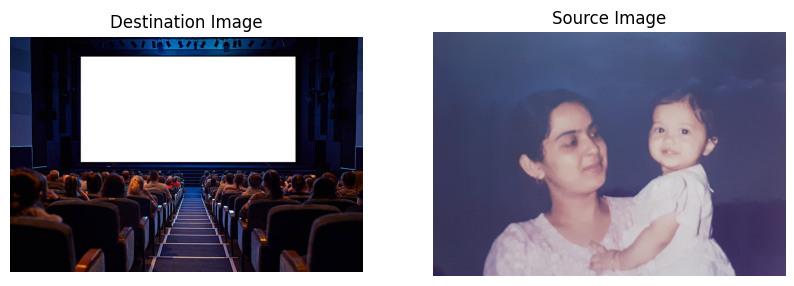

In [3]:
# Read the source and destination images
im_src = cv2.imread('mantu.jpg')
im_dst = cv2.imread('destination.jpg')

# Display source and destination images 
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Display the destination image
axes[0].imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
axes[0].set_title('Destination Image')
axes[0].axis('off')

# Display the source image
axes[1].imshow(cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB))
axes[1].set_title('Source Image')
axes[1].axis('off')

plt.show()

In [4]:
# Get the shape of the source image
size = im_src.shape

# Define source points as the four corners of the source image
pts_src = np.array([[0, 0],
                    [size[1] - 1, 0],
                    [size[1] - 1, size[0] - 1],
                    [0, size[0] - 1]], dtype=float)

Click on four points of the image displayed


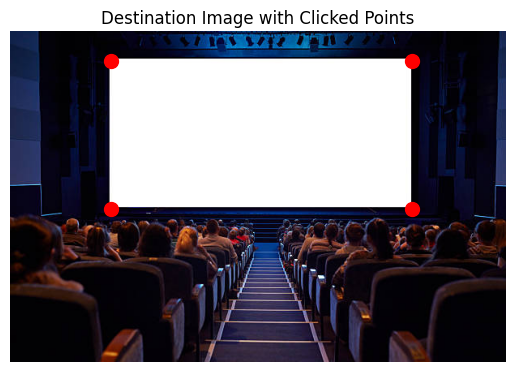

In [5]:
# Get four points from user input on the destination image
print('Click on four points of the image displayed')
pts_dst = get_four_points(im_dst)

# Display the destination image with clicked points
plt.imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
plt.scatter(pts_dst[:, 0], pts_dst[:, 1], c='r', s=100) # Plot clicked points on the image
plt.title('Destination Image with Clicked Points')
plt.axis('off')
plt.show()

### Calculate Homography between Source and Destination Points

In [6]:
# Find homography matrix using the source and destination points
h, status = cv2.findHomography(pts_src, pts_dst)

print('Homography Matrix:\n', h)

Homography Matrix:
 [[ 2.32020013e-01 -3.01386377e-04  1.24000000e+02]
 [-5.50994316e-18  1.64928834e-01  3.60000000e+01]
 [-4.32152405e-20 -2.43053530e-06  1.00000000e+00]]


In [7]:
# Black out the rectangular area in the destination image defined by the destination points
cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0, 16)  

# Warp the source image using the calculated homography matrix
wrapped_image = cv2.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))    

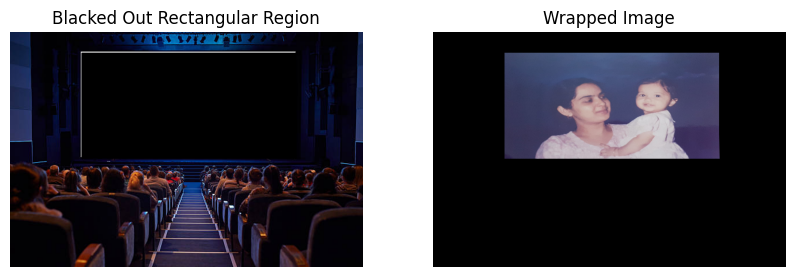

In [8]:
# Display the blacked-out rectangular region and the wrapped image side by side
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Display the blacked-out rectangular region
axes[0].imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
axes[0].set_title('Blacked Out Rectangular Region')
axes[0].axis('off')

# Display the wrapped image
axes[1].imshow(cv2.cvtColor(wrapped_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Wrapped Image')
axes[1].axis('off')

plt.show()

### Add Warped Source Image to Destination Image

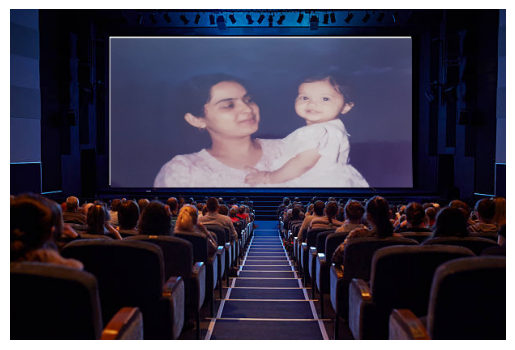

In [9]:
# Add the blacked-out rectangular region and the wrapped image to create the result image
result_image = im_dst + wrapped_image

# Display the result image
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()